## The Effect of Dropout

Let's see for ourselves how dropout actually affects training. We will use MNIST dataset and a simple convolutional network to do that:

In [1]:
# TensorFlow를 사용하여 MNIST 데이터셋을 로드하고 전처리
# 먼저 TensorFlow, NumPy 및 Matplotlib를 설치하고, MNIST 데이터셋을 로드한 다음, 픽셀 값을 0과 1 사이의 값으로 스케일링 함
# 마지막으로, 입력 데이터의 차원을 확장하여 채널 차원을 추가

%pip install tensorflow
%pip install numpy
%pip install matplotlib
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 55.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 40.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.6 MB/s eta 0:00:00:00:0100:01
   

2024-05-06 13:13:29.509120: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:13:29.617818: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:13:29.773235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 13:13:30.891702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


다음을 포함한 모든 훈련 과정을 처리하는 `train` 함수를 정의합니다:
* 주어진 탈락률 `d`로 신경망 아키텍처 정의하기
* 적절한 훈련 파라미터(최적화 및 손실 함수) 지정하기
* 훈련 수행 및 이력 수집하기

그런 다음 다양한 드롭아웃 값에 대해 이 함수를 실행합니다:

In [2]:
# 드롭아웃을 적용하여 모델을 훈련시키는 것으로, 다양한 드롭아웃 비율에 대해 훈련을 반복
# 모델은 합성곱 및 풀링 레이어를 거쳐 완전 연결 계층으로 이어지는 구조
# 훈련 후, 각 드롭아웃 비율에 대한 결과를 기록하고 반환

def train(d):
    print(f"Training with dropout = {d}")
    model = keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(d),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
    hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)
    return hist

res = { d : train(d) for d in [0,0.2,0.5,0.8] }

Training with dropout = 0


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2024-05-06 13:17:08.381969: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.8698 - loss: 0.4569

2024-05-06 13:17:33.988134: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - acc: 0.8699 - loss: 0.4564 - val_acc: 0.9784 - val_loss: 0.0675
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - acc: 0.9790 - loss: 0.0662 - val_acc: 0.9831 - val_loss: 0.0525
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - acc: 0.9858 - loss: 0.0456 - val_acc: 0.9866 - val_loss: 0.0391
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - acc: 0.9887 - loss: 0.0353 - val_acc: 0.9869 - val_loss: 0.0405
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - acc: 0.9917 - loss: 0.0260 - val_acc: 0.9867 - val_loss: 0.0408
Training with dropout = 0.2
Epoch 1/5


2024-05-06 13:20:03.159058: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - acc: 0.8536 - loss: 0.4840 - val_acc: 0.9795 - val_loss: 0.0639
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - acc: 0.9761 - loss: 0.0788 - val_acc: 0.9841 - val_loss: 0.0452
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - acc: 0.9828 - loss: 0.0520 - val_acc: 0.9880 - val_loss: 0.0359
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - acc: 0.9868 - loss: 0.0424 - val_acc: 0.9879 - val_loss: 0.0349
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - acc: 0.9887 - loss: 0.0363 - val_acc: 0.9893 - val_loss: 0.0322
Training with dropout = 0.5
Epoch 1/5


2024-05-06 13:23:13.752526: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - acc: 0.8308 - loss: 0.5488 - val_acc: 0.9789 - val_loss: 0.0697
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - acc: 0.9695 - loss: 0.0983 - val_acc: 0.9845 - val_loss: 0.0494
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - acc: 0.9773 - loss: 0.0738 - val_acc: 0.9877 - val_loss: 0.0399
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - acc: 0.9816 - loss: 0.0609 - val_acc: 0.9888 - val_loss: 0.0349
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - acc: 0.9839 - loss: 0.0503 - val_acc: 0.9894 - val_loss: 0.0300
Training with dropout = 0.8
Epoch 1/5


2024-05-06 13:26:24.290060: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - acc: 0.7526 - loss: 0.7424 - val_acc: 0.9755 - val_loss: 0.0848
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - acc: 0.9479 - loss: 0.1688 - val_acc: 0.9804 - val_loss: 0.0602
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - acc: 0.9605 - loss: 0.1284 - val_acc: 0.9856 - val_loss: 0.0457
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - acc: 0.9652 - loss: 0.1102 - val_acc: 0.9858 - val_loss: 0.0407
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - acc: 0.9692 - loss: 0.0981 - val_acc: 0.9876 - val_loss: 0.0376


다양한 드롭아웃 값에 대한 유효성 검사 정확도 그래프를 그려서 훈련이 얼마나 빠르게 진행되는지 확인

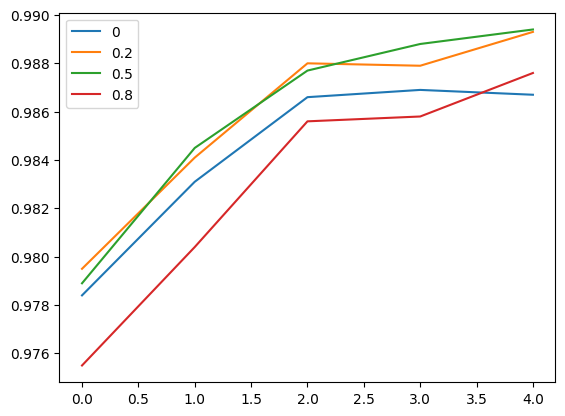

In [3]:
# 훈련된 모델의 결과를 시각화
# 각 드롭아웃 비율에 대한 검증 정확도(Validation Accuracy)를 그래프로 보여줌
# 그래프에서는 각 드롭아웃 비율에 대한 성능을 비교할 수 있음

for d,h in res.items():
    plt.plot(h.history['val_acc'],label=str(d))
plt.legend()

이 그래프에서 다음과 같은 내용을 확인할 수 있음
* 드롭아웃 값이 0.2-0.5 범위인 경우, 가장 빠른 훈련이 가장 좋은 전체 결과를 보여줌
* 드롭아웃이 없으면($d=0$), 훈련 과정이 덜 안정적이고 느려질 가능성이 높음
* 높은 드롭아웃(0.8)은 상황을 악화시킴